<a href="https://colab.research.google.com/github/QuentinHo0203/w23/blob/main/306_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)
library(ggplot2)

# **STATS 306 Homework 2**

### Problem 1: Registered pets in Seattle, WA: Warm Up (1 point)

In this problem, we will explore the *Seattle Pets* data set, which contains information about registered pets in Seattle, WA, between 2003 and 2018. The data set can be loaded by running the code below.

In [6]:
data <- read.csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-26/seattle_pets.csv"
)

**(a)** Print only the first 3 rows of the data set. *(0.25 points)*

In [7]:
# YOUR SOLUTION HERE
head(data,3)

,license_issue_date,license_number,animals_name,species,primary_breed,secondary_breed,zip_code
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,November 16 2018,8002756,Wall-E,Dog,"Mixed Breed, Medium (up to 44 lbs fully grown)",Mix,98108
2,November 11 2018,S124529,Andre,Dog,"Terrier, Jack Russell","Dachshund, Standard Wire Haired",98117
3,November 21 2018,903793,Mac,Dog,"Retriever, Labrador",NA,98136


**(b)** Create a data set that contains all columns of the original data set except `secondary_breed`. Then, drop rows with any missing values. Assign the resulting data set to the variable `data_nona`. *(0.25 points)*

In [94]:
# YOUR SOLUTION HERE
data_nona <- data[, !colnames(data) %in% "secondary_breed"]
data_nona <- na.omit(data_nona)
data_nona

,license_issue_date,license_number,animals_name,species,primary_breed,zip_code
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,November 16 2018,8002756,Wall-E,Dog,"Mixed Breed, Medium (up to 44 lbs fully grown)",98108
2,November 11 2018,S124529,Andre,Dog,"Terrier, Jack Russell",98117
3,November 21 2018,903793,Mac,Dog,"Retriever, Labrador",98136
4,November 23 2018,824666,Melb,Cat,Domestic Shorthair,98117
5,December 30 2018,S119138,Gingersnap,Cat,Domestic Shorthair,98144
6,December 16 2018,S138529,Cody,Dog,"Retriever, Labrador",98103
7,October 04 2017,580652,Millie,Dog,"Terrier, Boston",98115
8,August 09 2018,S142558,Sebastian,Cat,Domestic Shorthair,98122
9,August 20 2018,S142546,Madeline,Cat,Domestic Shorthair,98105


**(c)** Display the proportion of each species in `data_nona`. Make sure to round the numbers to 4 decimal places. *(0.25 points)*

In [68]:
# YOUR SOLUTION HERE
data_nona %>%
  group_by(species) %>%
    summarise(prop = round((n()/nrow(data_nona)),4)) %>%
    arrange (desc(prop))

species,prop
<chr>,<dbl>
Dog,0.6745
Cat,0.3247
Goat,0.0007
Pig,0.0001


**(d)** What are the top 3 dog names in `data_nona`? *(0.25 points)*

In [17]:
# YOUR SOLUTION HERE
dogs_data <- data_nona[data_nona$species == "Dog", ]
top_dog_names <- head(sort(table(dogs_data$animals_name), decreasing = TRUE), 3)
top_dog_names


   Lucy Charlie   Bella 
    335     306     245 

### Problem 2: Registered pets in Seattle, WA: In-Depth Analysis (4 points)

Before attempting this problem, you may want to read the following resources. If you prefer to learn from examples, feel free to jump straight into the examples for each function provided below.
1. https://stringr.tidyverse.org/reference/str_length.html
2. https://stringr.tidyverse.org/reference/str_detect.html
3. https://stringr.tidyverse.org/reference/str_sub.html
4. https://stringr.tidyverse.org/reference/word.html

You will learn more about working with text data after your midterm exam.

In [19]:
# str_length outputs the number of characters in a string

str_length('I am a cat') # there are 10 characters in the string, including spaces
str_length('R') # there is 1 character in the string

[1] 10

[1] 1

In [20]:
# str_detect outputs whether a substring is present in a string

str_detect('I am a cat', 'cat') # substring 'cat' is present in the string
str_detect('I am a cat', 'dog') # substring 'dog' is not present in the string

[1] TRUE

[1] FALSE

In [21]:
# str_sub outputs a substring of a string given starting and ending positions

str_sub('I am a cat', -3, -1) # obtains substring from position -3 (third from last) to -1 (last)
str_sub('I am a cat', 3, 4) # obtains substring from position 3 to 4

[1] "cat"

[1] "am"

In [22]:
# word outputs the n-th word in the string

word('I am a cat', 2) # obtains the second word in the string
word('I am a cat', -1) # obtains the last word in the string

[1] "am"

[1] "cat"

Now, here are the questions.

**(a)** Use `data_nona`. On average, are cat names longer or shorter or longer as compared to dog names? Use the `mean()` and `str_length()` functions in your answer. *(0.5 points)*

In [92]:
# YOUR SOLUTION HERE
cat_avg_length <- mean(str_length(data_nona[data_nona$species == "Cat", "animals_name"]))
dog_avg_length <- mean(str_length(data_nona[data_nona$species == "Dog", "animals_name"]))
if (cat_avg_length > dog_avg_length) {
  cat_vs_dog <- "longer"
} else if (cat_avg_length < dog_avg_length) {
  cat_vs_dog <- "shorter"
} else {
  cat_vs_dog <- "equal"
}

cat_avg_length
dog_avg_length
cat_vs_dog

[1] 5.91937

[1] 5.710271

[1] "longer"

On average, cat names are longer than dog names.

**(b)** In `data_nona`, what is the longest cat name? How many characters (including spaces) does the name contain? *(0.5 points)*

In [73]:
# YOUR SOLUTION HERE
data_nona %>%
  filter(species == "Cat") %>%
    group_by(animals_name) %>%
    mutate(char = str_length(animals_name)) %>%
    arrange (desc(char)) %>%
    head(1)

license_issue_date,license_number,animals_name,species,primary_breed,zip_code,month,char
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
April 11 2018,S104453,Her Ladyship Princess Penelope Peachfuzz Howe,Cat,Domestic Shorthair,98107,April,45


The longest cat name (including spaces) contain 45 characters.

**(c)** Create a data set called `data_dog`, which consists of only dogs in `data_nona`. Then, add a column called `year` to `data_dog`. As the name suggests, this column extracts the year from the column `license_issue_date`. The function `str_sub()` or `word()` might be helpful here.

In `data_dog`, which year saw the highest number of registered dogs? *(0.75 points)*

In [31]:
# YOUR SOLUTION HERE
data_dog <- data_nona %>%
  filter(species == "Dog") %>%
  mutate(year = as.numeric(str_sub(license_issue_date, -4, -1)))

year_with_highest_dogs <- data_dog %>%
  count(year) %>%
  filter(n == max(n)) %>%
  pull(year)

year_with_highest_dogs

[1] 2018

**(d)** A dog is a `Retriever` if its `primary_breed` contains the word `Retriever`. A dog is a `Terrier` if its `primary_breed` contains the word `Terrier`. A dog which is neither a `Retriever` nor a `Terrier` is an `Other`.

Focus on years 2016, 2017 and 2018 in `data_dog`. *Without introducing any intermediate variables*, display the proportions of Retrievers, Terriers and Others *within each year*, rounded to 3 decimal places. The function `str_detect()` might be useful here.

From these proportions, what can you say about the popularity of Terriers across the years? *(1.5 points)*



In [34]:
# YOUR SOLUTION HERE
data_dog_2016_2018 <- data_dog[data_dog$year %in% c(2016, 2017, 2018), ]
proportions_by_year <- round(prop.table(table(data_dog_2016_2018$year,
                       ifelse(str_detect(data_dog_2016_2018$primary_breed, "Retriever"), "Retriever",
                       ifelse(str_detect(data_dog_2016_2018$primary_breed, "Terrier"), "Terrier", "Other"))), margin = 1), 3)
proportions_by_year


      
       Other Retriever Terrier
  2016 0.628     0.205   0.167
  2017 0.640     0.213   0.146
  2018 0.661     0.202   0.136

**(e)** In `data_nona`, which month sees the highest $\frac{\textrm{number of registered cats}}{\textrm{number of registered dogs}}$? The function `word()` might be helpful here. *(0.75 points)*



In [77]:
# YOUR SOLUTION HERE
data_nona %>%
  filter(species %in% c("Cat", "Dog")) %>%
  group_by(month = word(license_issue_date, 1)) %>%
  summarise(ratio = sum (str_detect(species, "Cat") / sum(str_detect(species, "Dog")))) %>%
  arrange(desc(ratio)) %>%
  head(1)

month,ratio
<chr>,<dbl>
October,0.571831


### Problem 3: Air Quality (2.5 points)

In this problem, we will explore the *Air Quality* data set, which includes daily air quality measurements in New York from May to September 1973. It is a built-in data set in R, so we can directly load the data set. Use `help` or `?` to get a description of the data set.

In [36]:
# ?airquality
airquality %>% head()

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


**(a)** What is the total number of missing values in the data set? How many columns have at least one missing value? How many days (observations) have missing values? Show your code to derive these answers to receive full credit. *(1 point)*

In [78]:
#YOUR SOLUTION HERE
sum(is.na(airquality))
sum(colSums(is.na(airquality)) > 0)
sum(rowSums(is.na(airquality)) > 0)


[1] 44

[1] 2

[1] 42

The total number of missing values in the data set is 44.
2 columns have at least one missing value.
42 days have missing values



**(b)** Generate a line plot with dots reflecting the mean monthly temperature and ozone level, as shown below. What can you learn from the plot? Provide a brief description of the relationship between temperature and ozone level. Make sure to add appropriate titles and labels to the plot. *(1.5 points)*

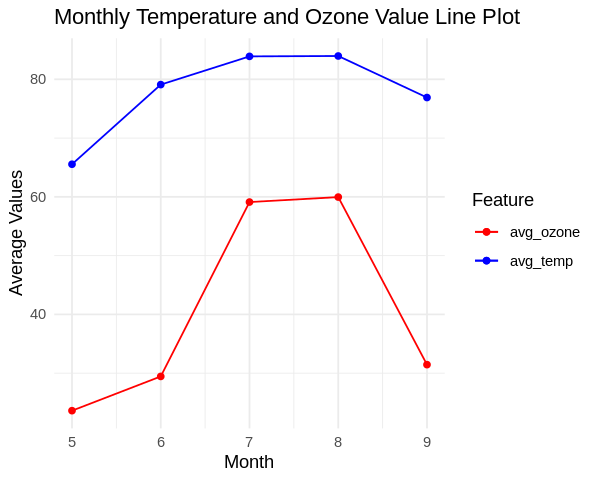

In [84]:
# YOUR SOLUTION HERE
monthly_means <- airquality %>%
  group_by(Month) %>%
  summarize(avg_temp = mean(Temp, na.rm = TRUE),
            avg_ozone = mean(Ozone, na.rm = TRUE))

ggplot(monthly_means, aes(x = Month)) +
  geom_line(aes(y = avg_temp, color = "avg_temp")) +
  geom_point(aes(y = avg_temp, color = "avg_temp")) +
  geom_line(aes(y = avg_ozone, color = "avg_ozone")) +
  geom_point(aes(y = avg_ozone, color = "avg_ozone")) +
  labs(title = "Monthly Temperature and Ozone Value Line Plot",
       x = "Month",
       y = "Average Values",
       color = "Feature") +
  scale_color_manual(values = c("avg_temp" = "blue", "avg_ozone" = "red")) +
  theme_minimal()

### Problem 4: Gapminder (2.5 points)
In this problem, we will explore *Gapminder*, a data set on life expectancy, GDP per capita, and population by country. It is an excerpt from the [Gapminder](https://www.gapminder.org/data/) data.

In [49]:
install.packages("gapminder")
library(gapminder)
gapminder %>% head()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


**(a)** Draw a bar plot (as shown below) to visualize the **proportion** of GDP by continent by year. We define GDP $:=$ GDP per Capita $\times$ population. *(1.5 points)*

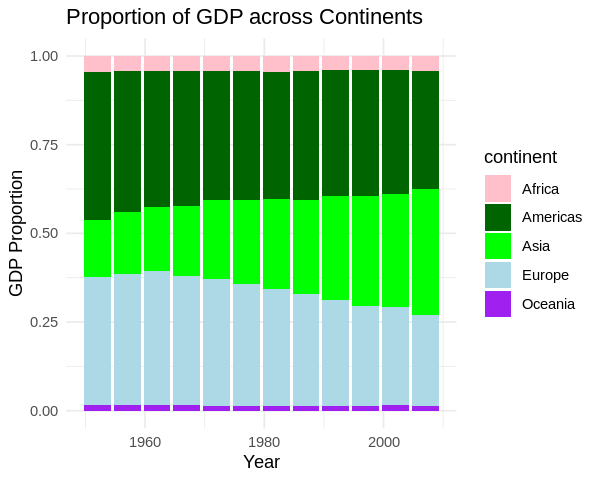

In [59]:
# YOUR SOLUTION HERE
continent_year_gdp <- gapminder %>%
  group_by(continent, year) %>%
  summarize(total_gdp =  sum(gdpPercap * pop), .groups = "drop")

continent_year_gdp <- continent_year_gdp %>%
  group_by(year) %>%
  mutate(proportion = total_gdp / sum(total_gdp))

ggplot(continent_year_gdp, aes(x = year, y = proportion, fill = continent)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of GDP across Continents",
       x = "Year",
       y = "GDP Proportion") +
  scale_fill_manual(values = c("Asia" = "green", "Europe" = "lightblue", "Africa" = "pink", "Americas" = "darkgreen", "Oceania" = "purple")) +
  theme_minimal()

**(b)** Generate a scatter plot with smooth line fit of life expectancy (x-axis) and GDP per capita (y-axis) for all countries in Europe. What can you learn from this graph? *(1 point)*

`geom_smooth()` using method = 'loess'


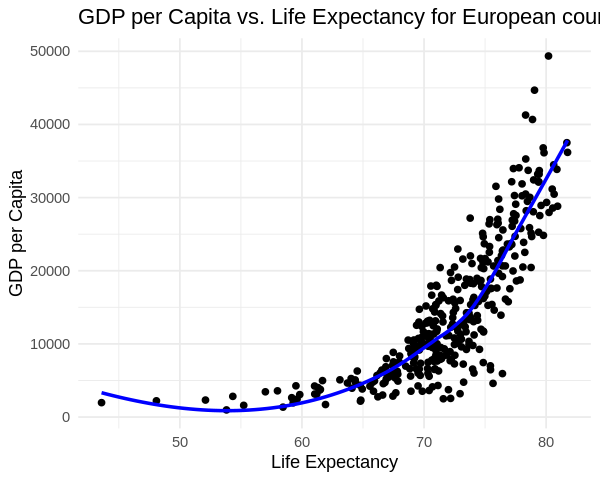

In [88]:
# YOUR SOLUTION HERE

ggplot(subset(gapminder, continent == "Europe"), aes(y = gdpPercap, x = lifeExp)) +
  geom_point() +
  geom_smooth(formula = y ~ x, se = FALSE, color = "blue") +
  labs(title = "GDP per Capita vs. Life Expectancy for European countries",
       y = "GDP per Capita",
       x = "Life Expectancy") +
  theme_minimal()